In [ ]:
# This notebook performs a statistical analysis on the psychometric performance
# of mice under optoinhibition

In [ ]:
# run this on Colab
!rm -rf APE_paper/
!git clone https://github.com/HernandoMV/APE_paper.git
%pip install mouse-behavior-analysis-tools
%cd APE_paper/docs/figures_notebooks

In [8]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from os.path import exists
import urllib.request

from mouse_behavior_analysis_tools.utils import custom_functions as cuf
from mouse_behavior_analysis_tools.utils.misc_utils import update_progress
from mouse_behavior_analysis_tools.plot import make_figures

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# download data from server
dataset_name = 'Optoinhibition-after-learning_dataframe.csv'
url = "https://zenodo.org/record/7261639/files/" + dataset_name
dataset_path = '../../data/' + dataset_name
# download if data is not there
if not exists(dataset_path):
    print('Downloading data...')
    urllib.request.urlretrieve(url, dataset_path)
else:
    print('Data already in directory')
# load
oal_df = pd.read_csv(dataset_path, index_col=0)

### Generate a dataset of random optostimulation choices
#### This is creating picking random choices, and matching trial number per session and difficulty, from trials in which there was no stimulation.
#### Compare this to the real data and get differences

In [ ]:
# Specify the number of random datasets to do
n_times = 1000

# Fix the random seed
np.random.seed(0)

# Compute the random dataframe
random_opto_df = cuf.get_random_dataframe_for_optostimulation(oal_df, n_times)

Adding info - Progress: [####################] 100.0%
Done computing the random dataframe


In [5]:
def significance_calculator(panda_series):
    cbe = panda_series.bias
    # get contra value
    if panda_series.stimulated_side == "Left":
        cbe = [-x for x in cbe]

    if panda_series.Genotype == "D1opto":
        n_sig = np.sum([x > 0 for x in cbe])
    if panda_series.Genotype == "D2opto":
        n_sig = np.sum([x < 0 for x in cbe])

    return n_sig / len(cbe)

# Calculate the contralateral significance of each session
random_opto_df['significance_value'] = [significance_calculator(random_opto_df.loc[x]) for x in random_opto_df.index.values]

### Generate **Figure 1E**

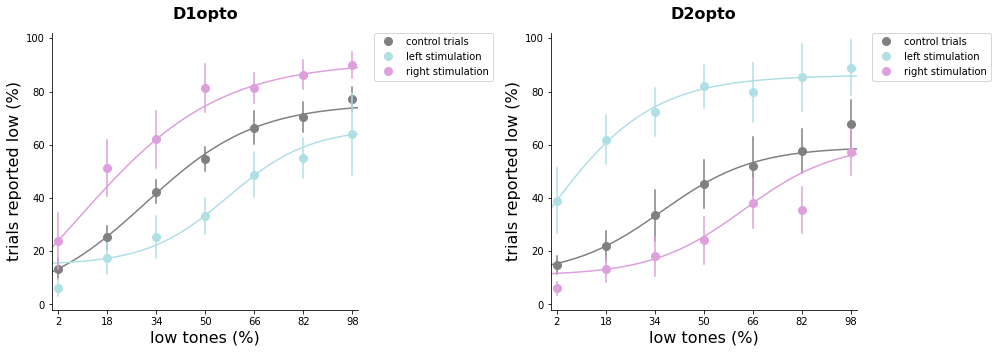

In [9]:
fig = make_figures.make_figure_optoinhibition_after_learning_curves(oal_df, random_opto_df)
plt.show(fig)
# uncomment here to save the plot
# data_directory = ''
# plt.savefig(data_directory + 'optoinhibition_after_learning_curves.pdf',
#             transparent=True, bbox_inches='tight')

#### Generate **Figure 1F**

Cohen's d for D1-Arch: -1.3651312463242402
Cohen's d for D2-Arch: 2.2944963611661793


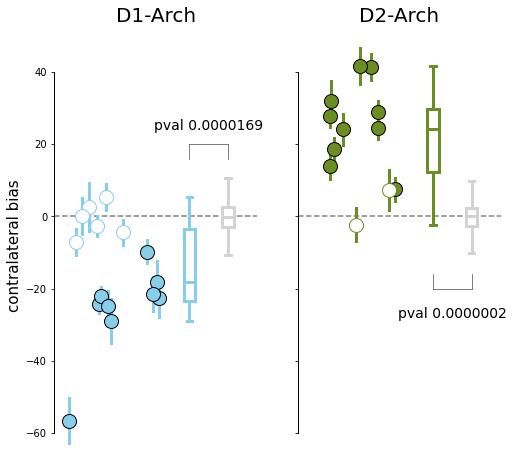

In [10]:
# fix the random seed (for reproducibility)
np.random.seed(190)
m, std, fig = make_figures.make_figure_optoinhibition_after_learning_batch(random_opto_df)
# uncomment here to save the plot
# fig.savefig('Fig1f_with_significance.pdf', dpi=300, bbox_inches='tight')